In [1]:
# First I will import some needed libraries
import pandas as pd
from importlib import reload
import sys
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
%matplotlib inline
import seaborn as sns 

[nltk_data] Downloading package wordnet to /Users/Robyn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Importing the Data

In [5]:
Hotdog_Winner = pd.read_excel('hotdog-contest-winners.xlsm')
Hotdog_Winner

,Year,Winner,Dogs eaten,Country,New record
0,1980,Paul Siederman & Joe Baldini,9.10,United States,0
1,1981,Thomas DeBerry,11.00,United States,0
2,1982,Steven Abrams,11.00,United States,0
3,1983,Luis Llamas,19.50,Mexico,0
4,1984,Birgit Felden,9.50,Germany,0
5,1985,Oscar Rodriguez,11.75,United States,0
6,1986,Mark Heller,15.50,United States,0
7,1987,Don Wolfman,12.00,United States,0
8,1988,Jay Green,14.00,United States,0
9,1989,Jay Green,13.00,United States,0


In [6]:
Hotdog_Places = pd.read_excel('hotdog-places.xlsm')
Hotdog_Places

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,25,50.0,50.5,44.5,53.5,49,54,66,59,68.0,54
1,24,31.0,26.0,30.5,38.0,37,52,63,59,64.5,43
2,22,23.5,25.5,29.5,32.0,32,37,49,42,55.0,37


In [7]:
Obama_Approval = pd.read_excel('obama-approval-ratings.xls')
Obama_Approval

,Issue,Approve,Disapprove,None
0,Race Relations,52,38,10
1,Education,49,40,11
2,Terrorism,48,45,7
3,Energy Policy,47,42,11
4,Foreign Affairs,44,48,8
5,Environment,43,51,6
6,Situation in Iraq,41,53,6
7,Taxes,41,54,5
8,Healthcare Policy,40,57,3
9,Economy,38,59,3


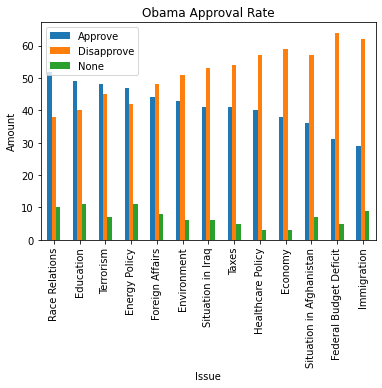

In [11]:
Obama_Approval.plot(kind='bar' , x='Issue', title="Obama Approval Rate", ylabel="Amount");

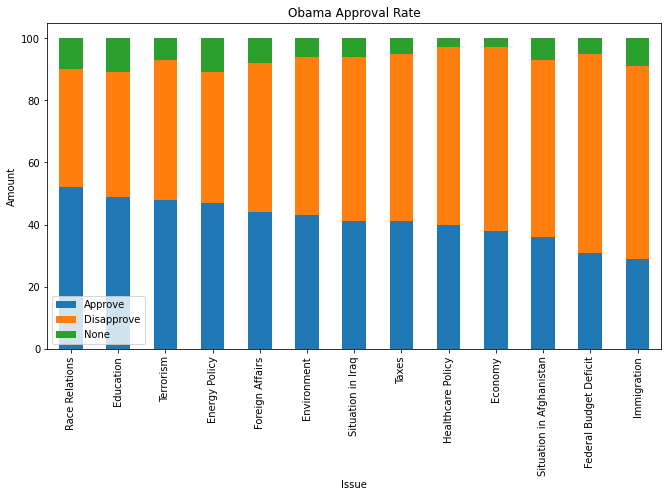

In [13]:
Obama_Approval.plot(kind='bar' , x='Issue', stacked=True, figsize= (11,6), title="Obama Approval Rate", 
                    ylabel="Amount");

In [19]:
Updated_Hotdog_Winner = Hotdog_Winner[['Country', 'Dogs eaten']].copy()
Updated_Hotdog_Winner

,Country,Dogs eaten
0,United States,9.10
1,United States,11.00
2,United States,11.00
3,Mexico,19.50
4,Germany,9.50
5,United States,11.75
6,United States,15.50
7,United States,12.00
8,United States,14.00
9,United States,13.00


<AxesSubplot:title={'center':'Percent of Hot Dogs Eaten by Country'}, ylabel='Dogs eaten'>

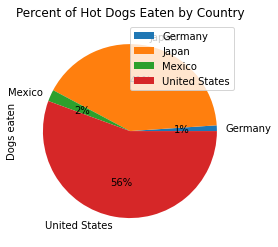

In [23]:
Updated_Hotdog_Winner.groupby(['Country']).sum().plot(
    kind='pie', y='Dogs eaten', autopct='%1.0f%%', title='Percent of Hot Dogs Eaten by Country')

In [29]:
Update_Hotdog_Winner = Updated_Hotdog_Winner.rename(columns={'Dogs eaten': 'Dogs_eaten'})
Update_Hotdog_Winner

,Country,Dogs_eaten
0,United States,9.10
1,United States,11.00
2,United States,11.00
3,Mexico,19.50
4,Germany,9.50
5,United States,11.75
6,United States,15.50
7,United States,12.00
8,United States,14.00
9,United States,13.00


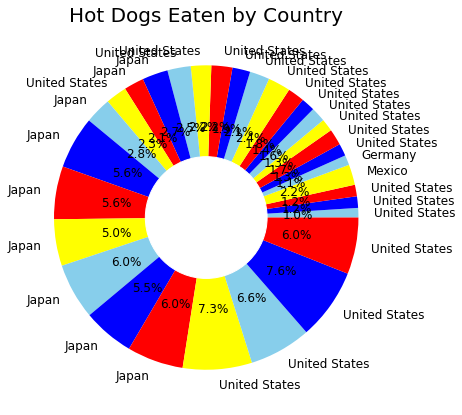

In [34]:
Country = Update_Hotdog_Winner.Country
eaten = Update_Hotdog_Winner.Dogs_eaten
colours = ["skyblue", "blue", "red", "yellow"]
plt.figure(figsize=(7,7))
plt.pie(eaten, labels=Country, autopct='%1.1f%%', colors=colours)
central_circle = plt.Circle((0, 0), 0.4, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Hot Dogs Eaten by Country", fontsize=20)
plt.show()

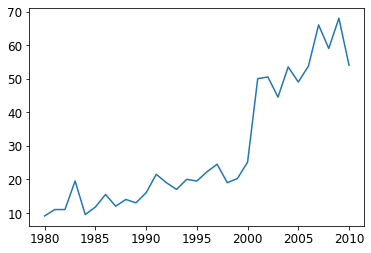

In [42]:
plt.plot(Hotdog_Winner["Year"], Hotdog_Winner["Dogs eaten"])
plt.show()

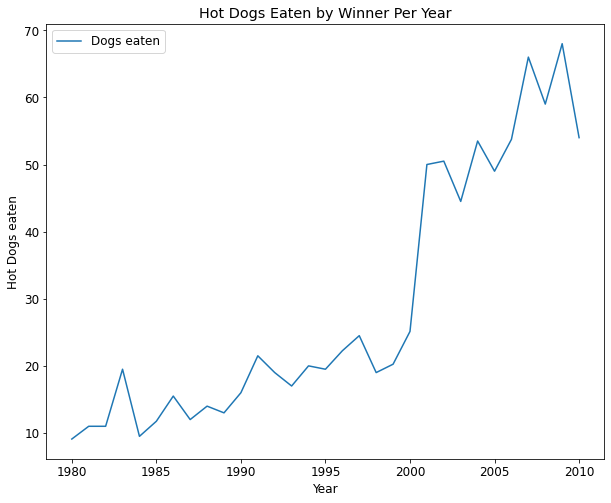

In [44]:
fig, ax = plt.subplots(figsize=(10,8))
Hotdog_Winner.plot.line(x='Year', y='Dogs eaten', ax=ax)
plt.ylabel("Hot Dogs eaten")
plt.title("Hot Dogs Eaten by Winner Per Year")
plt.show()